In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import os
import rasterio as rio
import arcpy
import seaborn as sns
import os, glob
from tifffile import imsave
import cv2
#import gdal
from osgeo import gdal
import os, arcpy
from arcpy import env
from rasterstats import zonal_stats
%matplotlib inline


In [3]:
file_path=r'EU_data/mmr_2/misschien/boundary_2.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

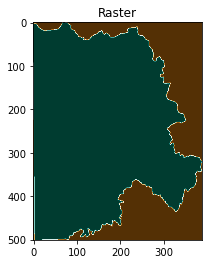

In [4]:
plt.imshow(luc_mmr, cmap="BrBG")
plt.title("Raster")
plt.show()

In [5]:
type(luc_mmr)

numpy.ndarray

In [6]:
list(map(tuple, np.where(np.isnan(luc_mmr))))

[(), ()]

In [6]:
file_path=r'EU_data/mmr_2/misschien/mmr_1996_tochwel.tif'
with rio.open(file_path) as dem_src:
    luc_1996 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [7]:
luc_1996[luc_1996==11] = 31
luc_1996[luc_1996==0] = 20
luc_1996[luc_1996==1] = 21
luc_1996[luc_1996==3] = 23
luc_1996[luc_1996==4] = 24
luc_1996[luc_1996==5] = 25
luc_1996[luc_1996==6] = 26
luc_1996[luc_1996==8] = 28
luc_1996[luc_1996==7] = 27
luc_1996[luc_1996==9] = 29
luc_1996[luc_1996==10] = 30
luc_1996[luc_1996==2] = 22

luc_1996[luc_1996==31] = 10
luc_1996[luc_1996==20] = 11
luc_1996[luc_1996==21] = 0
luc_1996[luc_1996==23] = 1
luc_1996[luc_1996==24] = 2
luc_1996[luc_1996==25] = 3
luc_1996[luc_1996==26] = 4
luc_1996[luc_1996==28] = 5
luc_1996[luc_1996==27] = 8
luc_1996[luc_1996==29] = 6
luc_1996[luc_1996==30] = 7
luc_1996[luc_1996==22] = 9

In [8]:
type(luc_1996)

numpy.ndarray

In [15]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_Q10.tif'
cv2.imwrite(outputPath, luc_1996)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [17]:
file_path=r'EU_data/mmr_2/mmr_land/mmr_boundary_raster_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [20]:
luc_mmr[100,100]

1.0

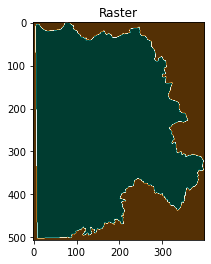

In [19]:
plt.imshow(luc_mmr, cmap="BrBG")
plt.title("Raster")
plt.show()

In [10]:

file_path=r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_updated.tif'
with rio.open(file_path) as dem_src:
    luc_1996 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

            #rainfall_data = cv2.imread(file_path ,0)
    #luc_1996=gdal.Open(file_path)

In [11]:
luc_1996

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

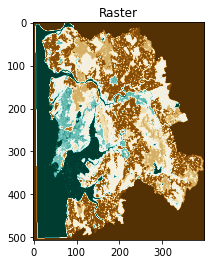

In [12]:
plt.imshow(luc_1996, cmap="BrBG")
plt.title("Raster")
plt.show()

In [13]:
luc_1996[luc_1996==11] = 31
luc_1996[luc_1996==0] = 20
luc_1996[luc_1996==1] = 21
luc_1996[luc_1996==3] = 23
luc_1996[luc_1996==4] = 24
luc_1996[luc_1996==5] = 25
luc_1996[luc_1996==6] = 26
luc_1996[luc_1996==8] = 28
luc_1996[luc_1996==7] = 27
luc_1996[luc_1996==9] = 29
luc_1996[luc_1996==10] = 30
luc_1996[luc_1996==2] = 22

luc_1996[luc_1996==31] = 10
luc_1996[luc_1996==20] = 11
luc_1996[luc_1996==21] = 0
luc_1996[luc_1996==23] = 1
luc_1996[luc_1996==24] = 2
luc_1996[luc_1996==25] = 3
luc_1996[luc_1996==26] = 4
luc_1996[luc_1996==28] = 5
luc_1996[luc_1996==27] = 8
luc_1996[luc_1996==29] = 6
luc_1996[luc_1996==30] = 7
luc_1996[luc_1996==22] = 9

In [14]:
luc_1996

array([[11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       ...,
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.],
       [11., 11., 11., ..., 11., 11., 11.]], dtype=float32)

In [15]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_land_1996_final_osm_nodes_raster_with_extent_Q6.tif'
cv2.imwrite(outputPath, luc_1996)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [3]:

file_path=r'EU_data/mmr_2/mmr_land/mmr_landuse_2016_final9.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()
    

In [4]:
np.unique(luc_2016)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=uint8)

In [5]:
luc_2016[luc_2016==11] = 31
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==2] = 22

luc_2016[luc_2016==31] = 10
luc_2016[luc_2016==20] = 11
luc_2016[luc_2016==21] = 0
luc_2016[luc_2016==23] = 1
luc_2016[luc_2016==24] = 2
luc_2016[luc_2016==25] = 3
luc_2016[luc_2016==26] = 4
luc_2016[luc_2016==28] = 5
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==29] = 6
luc_2016[luc_2016==30] = 7
luc_2016[luc_2016==22] = 9

In [8]:
outputPath = r'EU_data/mmr_2/mmr_land/mmr_landuse_2016_final10.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

Enrichment-curves switchback

In [6]:
file_path=r'EU_data/mmr_2/mmr_landuse_2016_final.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [7]:
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==2] = 22
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==11] = 31

luc_2016[luc_2016==20] = 1
luc_2016[luc_2016==21] = 2
luc_2016[luc_2016==22] = 3
luc_2016[luc_2016==23] = 4
luc_2016[luc_2016==24] = 5
luc_2016[luc_2016==25] = 6
luc_2016[luc_2016==26] = 7
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==28] = 9
luc_2016[luc_2016==29] = 10
luc_2016[luc_2016==30] = 11
luc_2016[luc_2016==31] = 0

In [8]:
outputPath = r'EU_data/mmr_2/mmr_landuse_2016_original.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [9]:
file_path=r'EU_data/mmr_2/mmr_landuse_1996_final.tif'
with rio.open(file_path) as dem_src:
    luc_2016 = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [10]:
luc_2016[luc_2016==0] = 20
luc_2016[luc_2016==1] = 21
luc_2016[luc_2016==2] = 22
luc_2016[luc_2016==3] = 23
luc_2016[luc_2016==4] = 24
luc_2016[luc_2016==5] = 25
luc_2016[luc_2016==6] = 26
luc_2016[luc_2016==7] = 27
luc_2016[luc_2016==8] = 28
luc_2016[luc_2016==9] = 29
luc_2016[luc_2016==10] = 30
luc_2016[luc_2016==11] = 31

luc_2016[luc_2016==20] = 1
luc_2016[luc_2016==21] = 2
luc_2016[luc_2016==22] = 3
luc_2016[luc_2016==23] = 4
luc_2016[luc_2016==24] = 5
luc_2016[luc_2016==25] = 6
luc_2016[luc_2016==26] = 7
luc_2016[luc_2016==27] = 8
luc_2016[luc_2016==28] = 9
luc_2016[luc_2016==29] = 10
luc_2016[luc_2016==30] = 11
luc_2016[luc_2016==31] = 0

In [12]:
outputPath = r'EU_data/mmr_2/mmr_landuse_1996_original.tif'
cv2.imwrite(outputPath, luc_2016)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

make framework

In [4]:
file_path=r'EU_data/mmr_2/mmr_boundary_raster_final.tif'
with rio.open(file_path) as dem_src:
    luc_mmr = dem_src.read(1)
    luc=gdal.Open(file_path)
    projection = luc.GetProjection()
    geotransform = luc.GetGeoTransform()

In [6]:
luc_mmr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [12]:
luc_mmr[luc_mmr==1]=0

In [19]:
outputPath = r'EU_data/mmr_2/mmr_frame.tif'
cv2.imwrite(outputPath, luc_mmr)
dataset2 = gdal.Open(outputPath, gdal.GA_Update)
dataset2.SetGeoTransform(geotransform)
dataset2.SetProjection(projection)

0

In [30]:
import geopandas as gpd
df = gpd.read_file('EU_data/mmr_2/cessed.shp')
df.head()

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.029690e+06,8.048601e+09,"MULTIPOLYGON (((270914.379 2095425.671, 270914..."
1,0,0,3.750496e+02,1.615913e+03,"POLYGON ((271497.550 2093977.680, 271494.111 2..."
2,0,0,6.095992e+01,1.294298e+02,"POLYGON ((272946.922 2102202.693, 272950.310 2..."
3,0,0,3.727112e+01,7.245881e+01,"POLYGON ((271172.775 2096962.338, 271178.209 2..."
4,0,0,6.086911e+01,1.999778e+02,"POLYGON ((269815.528 2092160.228, 269796.527 2..."


In [31]:
df.iloc[1:,0]=1

In [33]:
# Determine the output path for the Shapefile
outfp = 'EU_data/mmr_2/cessed_2.shp'

# Write the data into that Shapefile
df.to_file(outfp)

In [34]:
df

,Id,gridcode,Shape_Leng,Shape_Area,geometry
0,0,0,1.029690e+06,8.048601e+09,"MULTIPOLYGON (((270914.379 2095425.671, 270914..."
1,1,0,3.750496e+02,1.615913e+03,"POLYGON ((271497.550 2093977.680, 271494.111 2..."
2,1,0,6.095992e+01,1.294298e+02,"POLYGON ((272946.922 2102202.693, 272950.310 2..."
3,1,0,3.727112e+01,7.245881e+01,"POLYGON ((271172.775 2096962.338, 271178.209 2..."
4,1,0,6.086911e+01,1.999778e+02,"POLYGON ((269815.528 2092160.228, 269796.527 2..."
...,...,...,...,...,...
3066,1,0,2.003122e+02,1.143019e+03,"POLYGON ((269356.465 2091476.918, 269377.194 2..."
3067,1,0,2.064025e+02,9.242149e+02,"POLYGON ((269504.664 2091531.438, 269513.498 2..."
3068,1,0,5.202851e+02,2.655069e+03,"POLYGON ((269295.178 2091880.866, 269301.251 2..."
3069,1,0,6.636712e+02,3.871185e+03,"POLYGON ((271007.086 2093222.582, 271010.592 2..."
